In [1]:
from qTools import *
import Cahit as ck

import scipy.sparse as sp
import numpy as np
#
from functools import partial
from multiprocessing import Pool, cpu_count

import matplotlib.pyplot as plt
import datetime

In [2]:
resonatorDimension = 100
qfreq = 100
resFreq = 1

In [3]:
Rabi = QuantumSystem()
qSim = Simulation()
qSim.addSubSys(Rabi)
qSim.stepSize = 10e-3

In [4]:
cav = Cavity(dimension=100, frequency=1)
Rabi.addSubSys(cav)

qub = Rabi.createSubSys(subClass=Qubit, frequency=100, name='bob')

Cavity requires a dimension
Qubit requires a dimension


In [5]:
RabiCoupling = Rabi.createSysCoupling([qub,cav], [sigmax, create], [sigmax, destroy], couplingStrength=1)

In [6]:
Rabi.initialState = [0,1]

gc = np.sqrt(qfreq*resFreq)/2

fLoop = qSim.Sweep.createSweep(system=qub, sweepKey='frequency', sweepList=[10, 20, 30])

gSweep = qSim.timeDependency.createSweep(system=RabiCoupling, sweepKey='couplingStrength', name='gVal')

def gcList(sw, qs, ind):
    # qUniversal one returns the original value in parallel
    #freq = qUniversal.instNames['bob'].frequency
    freq = qs.qSystems.subSys['bob'].frequency
    qs.finalTime = 5/freq
    sw.subSys['gVal'].sweepList = np.linspace(0.0, 2*(np.sqrt(freq*resFreq)/2), qs.steps)
    
gAsign = qSim.Sweep.createSweep(system=gSweep, sweepKey='sweepList')
gAsign.sweepFunction = gcList

qSim.samples = 1

In [7]:
photonNumber = cav.freeMat
qubPop = qub.freeMat

def expect(qSim, state):
    qSim.qRes.results['PhotonNumber'].append(expectationKet(photonNumber, state))
    qSim.qRes.results['Something'].append(expectationKet(qubPop, state))

qSim.compute = expect

In [8]:
nw = datetime.datetime.now()
statesDigit = qSim.run(p=True, coreCount='all')
en = datetime.datetime.now()
print(en-nw)

0:00:07.104058


In [ ]:
print(len(qSim.qRes.results['PhotonNumber']))

In [ ]:
print(qSim.Sweep.inds)

In [ ]:
print((5/10)/10e-3)

In [ ]:
print(len(np.linspace(0.0, 2*(np.sqrt(10)/2), int((5/10)/10e-3))))

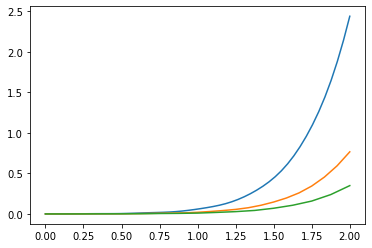

In [9]:
plt.plot(np.linspace(0.0, 2*(np.sqrt(10)/2), int((5/10)//10e-3)+1)/((np.sqrt(10)/2)), qSim.qRes.results['PhotonNumber'][0])
plt.plot(np.linspace(0.0, 2*(np.sqrt(20)/2), int((5/20)//10e-3)+1)/((np.sqrt(20)/2)), qSim.qRes.results['PhotonNumber'][1])
plt.plot(np.linspace(0.0, 2*(np.sqrt(30)/2), int((5/30)//10e-3)+1)/((np.sqrt(30)/2)), qSim.qRes.results['PhotonNumber'][2])

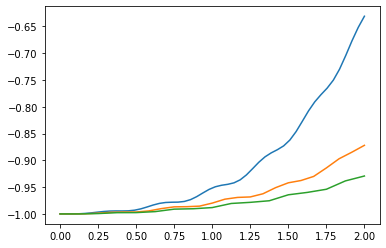

In [10]:
plt.plot(np.linspace(0.0, 2*(np.sqrt(10)/2), int((5/10)//10e-3)+1)/((np.sqrt(10)/2)), qSim.qRes.results['Something'][0])
plt.plot(np.linspace(0.0, 2*(np.sqrt(20)/2), int((5/20)//10e-3)+1)/((np.sqrt(20)/2)), qSim.qRes.results['Something'][1])
plt.plot(np.linspace(0.0, 2*(np.sqrt(30)/2), int((5/30)//10e-3)+1)/((np.sqrt(30)/2)), qSim.qRes.results['Something'][2])